In [9]:
import pandas as pd
import numpy as np
import random
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

from artifact.util import df_data
from artifact.sensitive_ssr import SensitiveSubspace,SensitiveShape,SensitiveRule
from artifact.sensitive_subspace_generation import generate_candidate
from artifact.pipeline_components import pipeline_setup_searching_algorithm,pipeline_patch_group_generation, pipeline_continous_group_generation

COLORS = ['#cdcdcd', '#00678a', '#984464', '#5eccab', '#56641a', '#e6a176', '#c0affb']

In [12]:
#Randomly generate a classification dataset for demonstration
default_2d=make_classification(n_features=2,n_informative=2,n_redundant=0,n_samples=1000,random_state=0)
df_default2d=pd.DataFrame(default_2d[0],columns=[f"feature {i}" for i in range(len(default_2d[0][0]))])
df_default2d["label"]=default_2d[1]
dfd=df_data(df_default2d,df_default2d["label"],[1])
df_default2d

,feature 0,feature 1,label
0,-1.441012,-0.780767,0
1,0.001605,1.416898,1
2,-0.963649,1.030862,1
3,-2.298670,2.381434,1
4,-0.300886,0.744814,1
...,...,...,...
995,-1.208829,-1.142871,0
996,0.700845,0.377319,1
997,-0.065309,-1.037620,0
998,-0.480992,0.258989,1


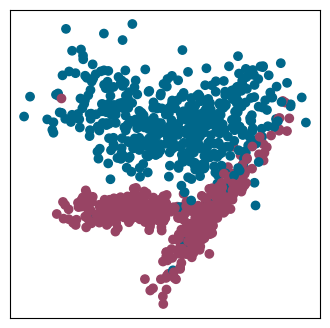

In [3]:
#Plot the generated dataset
fig=plt.figure(figsize=(4,4))
ax=plt.subplot()
x=df_default2d["feature 0"]
y=df_default2d["feature 1"]
colors=np.where(df_default2d["label"]==1,COLORS[1],COLORS[2])

ax.scatter(x,y,c=colors)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [4]:
#Create an example of SSR representation
shape=SensitiveShape()
shape.add(SensitiveRule("feature 1",-1.5,-0.5))
shape.add(SensitiveRule("feature 0",-2,-1))
shape
sg=SensitiveSubspace([shape])
shape=SensitiveShape()
shape.add(SensitiveRule("feature 1",-2,0))
shape.add(SensitiveRule("feature 0",0,2))
sg.add(shape)
sg

[[feature 1: -1.5~-0.5, feature 0: -2~-1]
[feature 1: -2~0, feature 0: 0~2]]

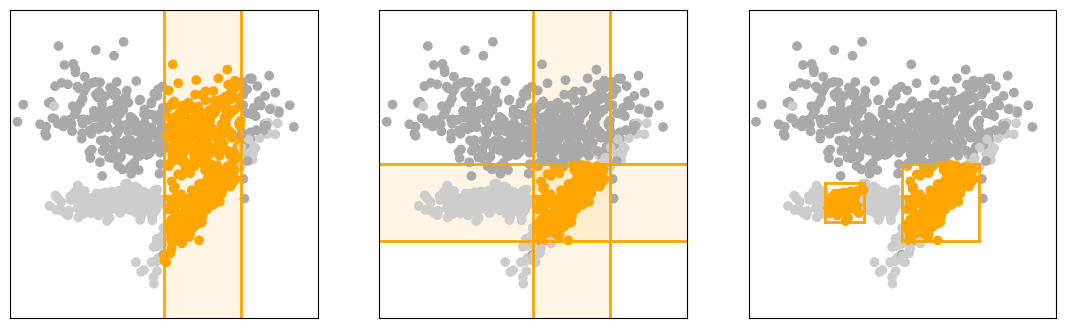

In [5]:
#Demo for Sensitive Rule, Sensitive Shape and Sensitive Subspace respectively
cols = [COLORS[0], 'darkgray']
fig,axs=plt.subplots(1,3,figsize=(13.5,4))
ax=axs[2]
x=df_default2d["feature 0"]
y=df_default2d["feature 1"]
conditions=[sg.select(df_default2d) ,df_default2d["label"]==1]
colours=["orange",cols[1]]
colors=np.select(conditions,colours,default=cols[0])

ax.plot((-2,-1),(-1.5,-1.5),c="orange",lw=2)
ax.plot((-2,-1),(-0.5,-0.5),c="orange",lw=2)
ax.plot((-1,-1),(-0.5,-1.5),c="orange",lw=2)
ax.plot((-2,-2),(-0.5,-1.5),c="orange",lw=2)

ax.plot((0,2),(-2,-2),c="orange",lw=2)
ax.plot((0,2),(-0,-0),c="orange",lw=2)
ax.plot((0,0),(-2,-0),c="orange",lw=2)
ax.plot((2,2),(-2,-0),c="orange",lw=2)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)

ax.scatter(x,y,c=colors)
ax.set_xticks([])
ax.set_yticks([])
#####
ax=axs[1]
x=df_default2d["feature 0"]
y=df_default2d["feature 1"]
shape=sg.shapes[1]
conditions=[shape.select(df_default2d) ,shape.rules[0].select(df_default2d) & shape.rules[1].select(df_default2d),df_default2d["label"]==1]
colours=["orange",cols[0],cols[1]]
colors=np.select(conditions,colours,default=cols[0])

ax.axvline(x=0,c="orange",lw=2)
ax.axvline(x=2,c="orange",lw=2)
ax.axhline(y=0,c="orange",lw=2)
ax.axhline(y=-2,c="orange",lw=2)
ax.fill_between(x=(-4, 4), y1=-2, y2=0, color="orange", alpha=0.1)
ax.fill_betweenx(y=(-4, 4), x1=0, x2=2, color="orange", alpha=0.1)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)

ax.set_xticks([])
ax.set_yticks([])

ax.scatter(x,y,c=colors)
#####
ax=axs[0]
x=df_default2d["feature 0"]
y=df_default2d["feature 1"]
shape=sg.shapes[1]
conditions=[shape.rules[1].select(df_default2d) ,df_default2d["label"]==1]
colours=["orange",cols[1]]

ax.axvline(x=0,c="orange",lw=2)
ax.axvline(x=2,c="orange",lw=2)
ax.fill_betweenx(y=(-4, 4), x1=0, x2=2, color="orange", alpha=0.1)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)

colors=np.select(conditions,colours,default=cols[0])

ax.scatter(x,y,c=colors)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("plots/Methodology/ssr_example.pdf",bbox_inches="tight")

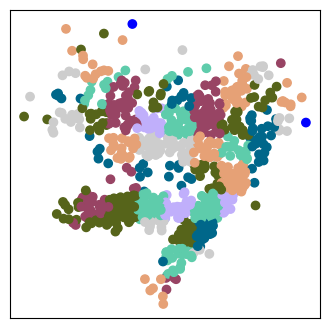

In [ ]:
#An illustration of patches of smaller shape during the Patch Subspace Generation
candidate=generate_candidate(df_default2d,10,["feature 0","feature 1"])
candidate=[sen_g for sen_g in candidate if sen_g.select(df_default2d).sum()>0]
fig=plt.figure(figsize=(4,4))
ax=plt.subplot()
x=df_default2d["feature 0"]
y=df_default2d["feature 1"]
random.seed(10100)
conditions=[sen_g.select(df_default2d) for sen_g in candidate]
#["blue","yellow","red","orange","lime","brown","purple", "orchid","black","pink","slategray"]
colours=[random.choice(COLORS) for _ in candidate]
colors=np.select(conditions,colours,default="blue")

ax.scatter(x,y,c=colors)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("plots/Methodology/patch1.pdf",bbox_inches="tight")

In [14]:
#Encode dataset with our custom representation
dfd=df_data(df_default2d[["feature 0","feature 1"]],df_default2d["label"],[1])

[[0.32709957 0.05624993]
 [0.11054405 0.0015453 ]
 [0.42031418 0.37850309]]


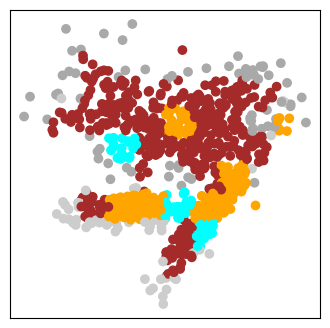

In [ ]:
#Demo for Patch Subspace Generation
_,goal=pipeline_setup_searching_algorithm({"sensitive_imbalanced":True,"n_group":4,"sensitive_random_state":400
                                           ,"group_dimension":2,"n_features":2},dfd)
sgs, _ =pipeline_patch_group_generation({"k":10,"prev_weight":1.5, "random_walk":0.2 },dfd,["feature 0","feature 1"],goal)

fig=plt.figure(figsize=(4,4))
ax=plt.subplot()
x=df_default2d["feature 0"]
y=df_default2d["feature 1"]

conditions=[sgs[0].select(df_default2d) ,sgs[1].select(df_default2d),sgs[2].select(df_default2d) ,df_default2d["label"]==1]
colours=["orange","cyan","brown","darkgray"]
colors=np.select(conditions,colours,default=COLORS[0])

ax.scatter(x,y,c=colors)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("plots/Methodology/patch2.pdf",bbox_inches="tight")

[[0.32709957 0.05624993]
 [0.11054405 0.0015453 ]
 [0.42031418 0.37850309]]
[[feature 1: -1.2234~0.0326, feature 0: -2.3691~1.9415], [feature 1: -1.8514~-1.2234, feature 0: -3.806~2.66], [feature 0: 0.5046~3.3784, feature 1: -1.8514~2.5445]]


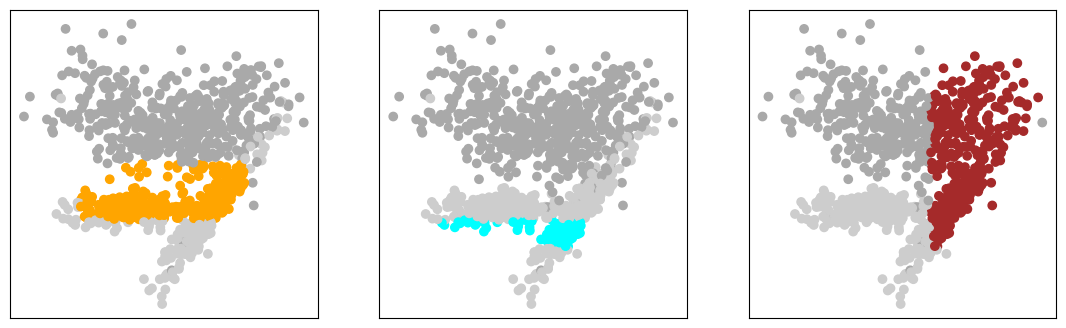

In [ ]:
_,goal=pipeline_setup_searching_algorithm({"sensitive_imbalanced":True,"n_group":4,"sensitive_random_state":400
                                           ,"group_dimension":2,"n_features":2},dfd)
sgs, _ =pipeline_continous_group_generation({"k":10,"prev_weight":1.5, "random_walk":0.2, "sensitive_random_state":10100,"coefficient":1.2 },
                                            dfd,["feature 0","feature 1"],goal)

print(sgs)

fig,axs=plt.subplots(1,3,figsize=(13.5,4))
colors=["orange","cyan","brown"]

for i in range(3):
    ax=axs[i]
    x=df_default2d["feature 0"]
    y=df_default2d["feature 1"]
    conditions=[sgs[i].select(df_default2d) ,df_default2d["label"]==1]
    c=[colors[i],"darkgray"]
    c=np.select(conditions,c,default=COLORS[0])
    ax.scatter(x,y,c=c)
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig("plots/Methodology/continous.pdf",bbox_inches="tight")

### Distribution of Bias Scores

In [8]:
df_meta = pd.read_csv("artifact/metadataset.csv")

# exclude random states because they do not carry information
df_meta = df_meta.drop('dataset_random_state', axis=1)
df_meta = df_meta.drop('sensitive_random_state', axis=1)
df_meta = df_meta.drop('landmarking_random_state', axis=1)

# exclude arrays of class- or group-specific information as their shape is 
#  dataset-specific and does not generalize
df_meta = df_meta.drop('class_weight', axis=1)
df_meta = df_meta.drop('sensitive_group_scores', axis=1)

In [13]:
features = df_meta.columns[:-6]
targets = ['disparate_parity', 'equal_opportunity', 'group_fairness']
target_names = ['Disparate Parity', 'Equal Opportunity', 'Group Fairness']
target_names_w = [textwrap.fill(name, width=10, break_long_words=False) for name in target_names]
COLORS = ['#00678a', '#984464', '#5eccab', '#56641a', '#e6a176', '#c0affb']
target_to_color = dict(zip(targets, COLORS[:3]))

In [14]:
sns.set_style("ticks", rc={"font.size": 10})
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.size": 10})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


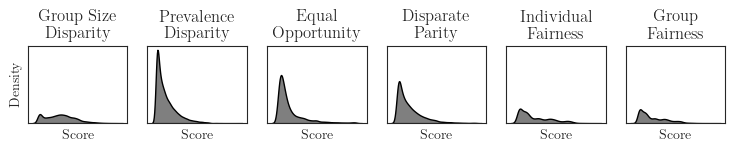

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(9,1), sharey=True)
for idx, target in enumerate(targets):
    sns.kdeplot(data=df_meta, x=target, ax=axes[idx], 
                color='black', fill=True, alpha=.5)
    axes[idx].set_yticks([], [])
    axes[idx].set_xticks([], [])
    axes[idx].set_title(target_names_w[idx])
    axes[idx].set_xlabel('Score')
plt.savefig('plots/Methodology/distribution_of_bias_scores.pdf', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


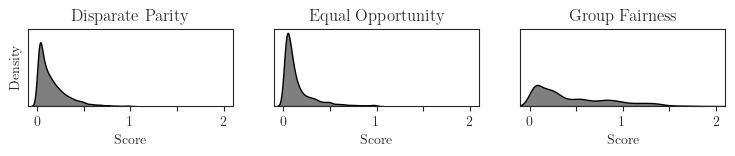

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9,1), sharey=True)
for idx, target in enumerate(targets):
    sns.kdeplot(data=df_meta, x=target, ax=axes[idx], 
                color='black', fill=True, alpha=.5)
    axes[idx].set_yticks([], [])
    axes[idx].set_xticks([0, 0.5, 1, 1.5, 2], [0, '', 1, '', 2])
    axes[idx].set_xlim(-0.1, 2.1)
    axes[idx].set_title(target_names[idx])
    axes[idx].set_xlabel('Score')
plt.savefig('plots/Methodology/distribution_of_bias_scores_annot.pdf', bbox_inches='tight')
plt.show()